# Result Explorer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from process import performance, fitness_by_generation, show_values_on_bars

## Settings

In [2]:
sns.set('paper', 'white', font_scale=1.5,
        rc={'xtick.bottom': True,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            'ytick.left': True})
sns.set_palette(['dimgrey','lightcoral','maroon'])
pd.options.display.precision = 2
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
os.makedirs('img', exist_ok=True)
fmts = ['png', 'eps']

## Main Experiment

In [4]:
problems = ['02', '04', '14', '27', 'c01', 'c02']
problem_names = ['SL', 'CSL', 'CO', 'MD', 'C01', 'C02']
seeds = range(1001, 1022)
comparison1 = ['umad', 'rand_mixt', 'adapt_mixt']
label1 = ['None', 'Rand+Transferred', 'Adapt+Transferred']
comparison2 = ['adapt_mixt']
label2 = ['Kt+Adapt']

### Read experimental results

In [5]:
with open('dat.transfer.csv', 'w') as f:
    f.write(
        'problem;method;seed;is_train_solved;is_test_solved;'\
        'train_error;test_error;generation\n'
    )
with open('dat.transfer.csv', 'a') as f:
    for problem, problem_name in zip(problems, problem_names):
        for method, label in zip(comparison1, label1):
            for seed in seeds:
                try:
                    pvector = performance(f'{problem}/dat/{method}{seed}.log')
                    f.write(
                        '{};{};{};{};{};{};{};{}\n'.format(
                            problem_name,
                            label,
                            seed,
                            *pvector
                        )
                    )
                except FileNotFoundError as e:
                    print(str(e))
dat = pd.read_csv('dat.transfer.csv', delimiter=';')
dat.head(3)

,problem,method,seed,is_train_solved,is_test_solved,train_error,test_error,generation
0,SL,None,1001,False,False,80.0,375.0,300
1,SL,None,1002,False,False,110.0,565.0,300
2,SL,None,1003,False,False,67.0,324.0,300


In [6]:
for problem in problem_names:
    dat.loc[dat.problem==problem, 'train_error'] = (
        dat[dat.problem==problem].train_error - \
            dat[dat.problem==problem].train_error.min()
    ) / (
        dat[dat.problem==problem].train_error.max() - \
            dat[dat.problem==problem].train_error.min()
    )
    dat.loc[dat.problem==problem, 'test_error'] = (
        dat[dat.problem==problem].test_error - \
            dat[dat.problem==problem].test_error.min()
    ) / (
        dat[dat.problem==problem].test_error.max() - \
            dat[dat.problem==problem].test_error.min()
    )

### Success rate

In [7]:
dat.groupby([
    'problem',
    'method'
]).sum()[[
    'is_train_solved',
    'is_test_solved'
]]

is_train_solved  is_test_solved
problem method                                            
C01     Adapt+Transferred                8               8
        None                             0               0
        Rand+Transferred                 0               0
C02     Adapt+Transferred               11               8
        None                             1               1
        Rand+Transferred                 2               1
CO      Adapt+Transferred                1               1
        None                             0               0
        Rand+Transferred                 1               1
CSL     Adapt+Transferred                1               0
        None                             1               1
        Rand+Transferred                 2               1
MD      Adapt+Transferred                2               2
        None                             5               5
        Rand+Transferred                 0               0
SL      Adapt+Transferred                0               0
        None                             1               1
        Rand+Transferred                 1               0

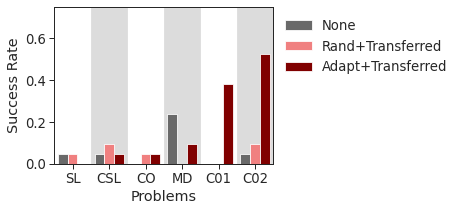

In [8]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='problem',
    y='is_train_solved',
    data=dat,
    hue='method',
    errwidth=0,
    saturation=1
)
rect1 = matplotlib.patches.Rectangle(( 0.5,0), 1, 1.05, color='gainsboro', zorder=0)
rect2 = matplotlib.patches.Rectangle(( 2.5,0), 1, 1.05, color='gainsboro', zorder=0)
rect3 = matplotlib.patches.Rectangle(( 4.5,0), 1, 1.05, color='gainsboro', zorder=0)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.set_xlabel('Problems')
ax.set_ylabel('Success Rate')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
# show_values_on_bars(ax, size=12, hspace=0.02, vspace=0.05)
plt.subplots_adjust(right=0.6, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/transfer.success.rate.train.{fmt}', dpi=600)

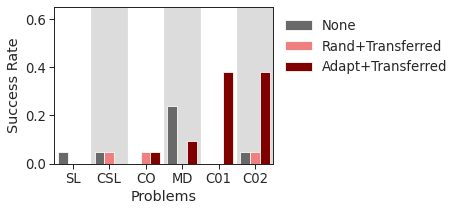

In [9]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='problem',
    y='is_test_solved',
    data=dat,
    hue='method',
    errwidth=0,
    saturation=1
)
rect1 = matplotlib.patches.Rectangle(( 0.5,0), 1, 1.05, color='gainsboro', zorder=0)
rect2 = matplotlib.patches.Rectangle(( 2.5,0), 1, 1.05, color='gainsboro', zorder=0)
rect3 = matplotlib.patches.Rectangle(( 4.5,0), 1, 1.05, color='gainsboro', zorder=0)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.set_xlabel('Problems')
ax.set_ylabel('Success Rate')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
# show_values_on_bars(ax, size=12, hspace=0.02, vspace=0.05)
plt.subplots_adjust(right=0.6, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/transfer.success.rate.test.{fmt}', dpi=600)

### Error

In [10]:
dat.groupby([
    'problem',
    'method'
]).aggregate([
    np.min,
    np.median,
    np.max,
    np.mean,
    np.std
])[[
    'train_error',
    'test_error'
]]

train_error                          test_error  \
                                 amin median  amax  mean   std       amin   
problem method                                                              
C01     Adapt+Transferred        0.00   0.46  0.99  0.37  0.34   0.00e+00   
        None                     0.31   0.75  1.00  0.74  0.23   3.66e-01   
        Rand+Transferred         0.39   0.50  0.55  0.49  0.04   5.07e-01   
C02     Adapt+Transferred        0.00   0.00  0.45  0.11  0.16   0.00e+00   
        None                     0.00   0.58  1.00  0.55  0.32   0.00e+00   
        Rand+Transferred         0.00   0.29  0.52  0.25  0.16   0.00e+00   
CO      Adapt+Transferred        0.00   0.89  1.00  0.85  0.20   0.00e+00   
        None                     0.74   0.88  0.98  0.89  0.06   6.34e-01   
        Rand+Transferred         0.00   0.88  0.96  0.84  0.20   0.00e+00   
CSL     Adapt+Transferred        0.00   0.42  0.74  0.44  0.22   2.10e-06   
        None                     0.00   0.53  0.95  0.49  0.24   0.00e+00   
        Rand+Transferred         0.00   0.47  1.00  0.47  0.26   0.00e+00   
MD      Adapt+Transferred        0.00   0.62  1.00  0.50  0.31   0.00e+00   
        None                     0.00   0.14  0.59  0.14  0.13   0.00e+00   
        Rand+Transferred         0.14   0.38  0.84  0.41  0.21   1.79e-01   
SL      Adapt+Transferred        0.10   0.56  0.98  0.59  0.23   1.07e-01   
        None                     0.00   0.56  1.00  0.57  0.28   0.00e+00   
        Rand+Transferred         0.00   0.66  0.94  0.62  0.27   3.95e-03   

                                                                   
                             median      amax      mean       std  
problem method                                                     
C01     Adapt+Transferred  5.24e-01  9.88e-01  3.99e-01  3.55e-01  
        None               7.31e-01  1.00e+00  7.68e-01  2.25e-01  
        Rand+Transferred   5.40e-01  5.74e-01  5.42e-01  1.90e-02  
C02     Adapt+Transferred  2.00e-05  5.00e-01  2.39e-02  1.09e-01  
        None               1.43e-04  1.00e+00  4.77e-02  2.18e-01  
        Rand+Transferred   7.50e-05  1.00e+00  4.77e-02  2.18e-01  
CO      Adapt+Transferred  8.70e-01  1.00e+00  8.40e-01  2.02e-01  
        None               8.72e-01  9.91e-01  8.77e-01  8.32e-02  
        Rand+Transferred   8.68e-01  9.94e-01  8.38e-01  2.08e-01  
CSL     Adapt+Transferred  1.27e-05  1.00e+00  5.67e-02  2.18e-01  
        None               1.02e-05  5.24e-01  4.54e-02  1.38e-01  
        Rand+Transferred   8.95e-06  1.53e-05  8.80e-06  4.22e-06  
MD      Adapt+Transferred  6.54e-01  1.00e+00  5.26e-01  3.26e-01  
        None               2.04e-01  6.77e-01  1.92e-01  1.53e-01  
        Rand+Transferred   3.88e-01  8.10e-01  4.53e-01  2.18e-01  
SL      Adapt+Transferred  2.69e-01  1.00e+00  4.04e-01  2.65e-01  
        None               2.73e-01  8.66e-01  3.59e-01  2.40e-01  
        Rand+Transferred   4.23e-01  6.32e-01  3.57e-01  1.75e-01

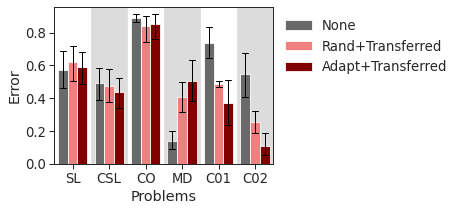

In [11]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='problem',
    y='train_error',
    data=dat,
    hue='method',
    errcolor='black',
    errwidth=1,
    capsize=0.165,
    saturation=1
)
rect1 = matplotlib.patches.Rectangle(( 0.5,0), 1, 1.05, color='gainsboro', zorder=0)
rect2 = matplotlib.patches.Rectangle(( 2.5,0), 1, 1.05, color='gainsboro', zorder=0)
rect3 = matplotlib.patches.Rectangle(( 4.5,0), 1, 1.05, color='gainsboro', zorder=0)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.set_xlabel('Problems')
ax.set_ylabel('Error')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
plt.subplots_adjust(right=0.6, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/transfer.error.train.{fmt}', dpi=600)

### Generation (successful runs)

In [12]:
dat.groupby([
    'problem',
    'method'
]).aggregate([
    np.min,
    np.median,
    np.max,
    np.mean,
    np.std
])['generation']

amin  median  amax    mean    std
problem method                                              
C01     Adapt+Transferred    57   300.0   300  231.95  97.16
        None                300   300.0   300  300.00   0.00
        Rand+Transferred    300   300.0   300  300.00   0.00
C02     Adapt+Transferred    81   259.0   300  228.38  80.60
        None                160   300.0   300  293.33  30.55
        Rand+Transferred    205   300.0   300  295.00  20.74
CO      Adapt+Transferred   247   300.0   300  297.48  11.57
        None                300   300.0   300  300.00   0.00
        Rand+Transferred    163   300.0   300  293.48  29.90
CSL     Adapt+Transferred   237   300.0   300  297.00  13.75
        None                194   300.0   300  294.95  23.13
        Rand+Transferred    215   300.0   300  295.48  18.57
MD      Adapt+Transferred   168   300.0   300  287.95  38.09
        None                 61   300.0   300  270.14  72.64
        Rand+Transferred    300   300.0   300  300.00   0.00
SL      Adapt+Transferred   300   300.0   300  300.00   0.00
        None                118   300.0   300  291.33  39.72
        Rand+Transferred    286   300.0   300  299.33   3.06

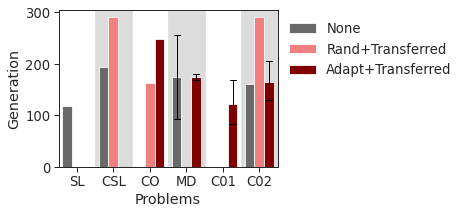

In [13]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='problem',
    y='generation',
    data=dat[dat['is_test_solved']],
    hue='method',
    errcolor='black',
    errwidth=1,
    capsize=0.165,
    saturation=1
)
rect1 = matplotlib.patches.Rectangle(( 0.5,0), 1, 305, color='gainsboro', zorder=0)
rect2 = matplotlib.patches.Rectangle(( 2.5,0), 1, 305, color='gainsboro', zorder=0)
rect3 = matplotlib.patches.Rectangle(( 4.5,0), 1, 305, color='gainsboro', zorder=0)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.set_xlabel('Problems')
ax.set_ylabel('Generation')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
plt.subplots_adjust(right=0.6, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/transfer.generation.{fmt}', dpi=600)

### Evolutionary Process

In [14]:
with open('dat.transfer.fit.csv', 'w') as f:
    f.write(
        'problem;method;seed;generation;fitness\n'
    )
with open('dat.transfer.fit.csv', 'a') as f:
    for problem, problem_name in zip(problems, problem_names):
        for method, label in zip(comparison1, label1):
            for seed in seeds:
                try:
                    fitnesses = fitness_by_generation(
                        f'{problem}/dat/{method}{seed}.log',
                        300
                    )
                    for i, fit in enumerate(fitnesses):
                        f.write(
                            '{};{};{};{};{}\n'.format(
                                problem_name,
                                label,
                                seed,
                                i+1,
                                fit
                            )
                        )
                except FileNotFoundError as e:
                    print(str(e))
dat = pd.read_csv('dat.transfer.fit.csv', delimiter=';')
dat.head(3)

,problem,method,seed,generation,fitness
0,SL,None,1001,1,418.0
1,SL,None,1001,2,368.0
2,SL,None,1001,3,312.0


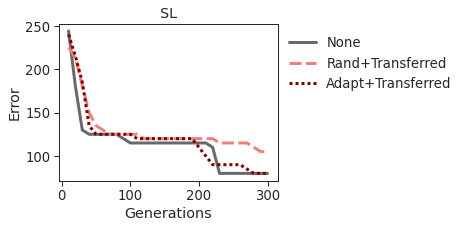

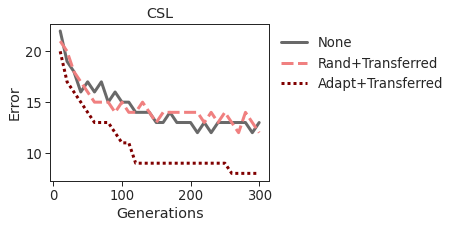

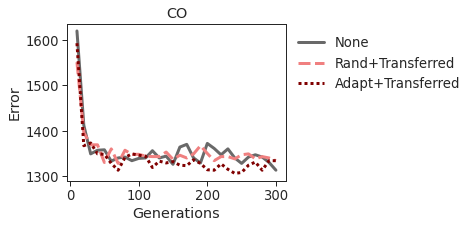

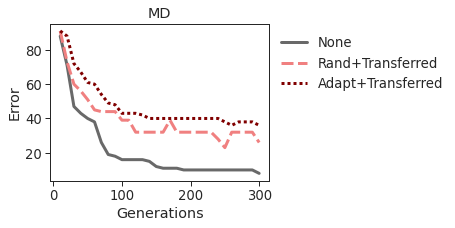

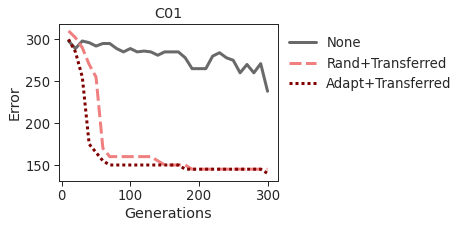

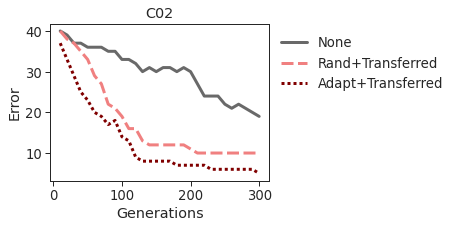

In [15]:
for problem_name in problem_names:
    plt.figure(figsize=(6.4, 3.2))
    ax = sns.lineplot(
        x='generation',
        y='fitness',
        data=dat[(dat.problem==problem_name) & (dat.generation%10==0)],
        hue='method',
        style='method',
        estimator=np.median,
        err_style=None,
        linewidth=3
    )
    ax.set_title(f'{problem_name}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Error')
    leg = ax.legend(
        bbox_to_anchor=(1., 1.),
        loc='upper left',
        facecolor='none',
        framealpha=0.
    )
    for line in leg.get_lines():
        line.set_linewidth(3)
    plt.subplots_adjust(right=0.6, bottom=0.2)
    for fmt in fmts:
        plt.savefig(f'img/transfer.fitness.{problem_name}.{fmt}', dpi=600)
    plt.show()